# 1. 데이터셋 준비

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error 
from sklearn import *
from sklearn.model_selection import train_test_split

kwew = pd.read_csv('kwew.csv')
kwew_test = pd.read_csv('kwew_test.csv')
kwew1 = pd.read_csv('kwew1.csv')
kwew_test1 = pd.read_csv('kwew_test1.csv')


In [3]:
# 최근 4주 관련 데이터 모두 제거
new_kwew1 = kwew1.drop(columns=['like_4ep','like_4ep_slope','comments_4ep','comments_4ep_slope','knu_1_4ep','knu_2_4ep','knu_3_4ep','movie_1_4ep','movie_2_4ep','movie_3_4ep','fodo_1_4ep','fodo_2_4ep','fodo_3_4ep','att_1_4ep','att_2_4ep','att_3_4ep','www','y'])
new_kwew_test1 = kwew_test1.drop(columns=['like_4ep','like_4ep_slope','comments_4ep','comments_4ep_slope','knu_1_4ep','knu_2_4ep','knu_3_4ep','movie_1_4ep','movie_2_4ep','movie_3_4ep','fodo_1_4ep','fodo_2_4ep','fodo_3_4ep','att_1_4ep','att_2_4ep','att_3_4ep','www','y'])

In [125]:
# 서로 다른 사전 제외
new_kwew1 = new_kwew1.drop(columns=[ 'knu_1_tot', 'knu_2_tot', 'knu_3_tot',
       'movie_1_tot', 'movie_2_tot', 'movie_3_tot', 'fodo_1_tot', 'fodo_2_tot',
       'fodo_3_tot'])
new_kwew_test1 = new_kwew_test1.drop(columns=[ 'knu_1_tot', 'knu_2_tot', 'knu_3_tot',
       'movie_1_tot', 'movie_2_tot', 'movie_3_tot', 'fodo_1_tot', 'fodo_2_tot',
       'fodo_3_tot'])

In [156]:
# 데이터셋 오류 정정 코드 #

# 남주의 첫날밤 제거
new_kwew1 = new_kwew1.drop(index=0)
new_kwew1

,ew_y,author_ex,trend_slope,rate,social_search,max_ep,subscribe,like_tot,like_tot_slope,comments_tot,...,genre_2_감성,genre_2_개그,genre_2_드라마,genre_2_로맨스,genre_2_스릴러,genre_2_스포츠,genre_2_시대극,genre_2_액션,genre_2_일상,genre_2_판타지
1,0.716877,0.0,-0.006448,9.92,0.0,92,567125,22020.413043,-217.270918,1166.869565,...,0,0,0,1,0,0,0,0,0,0
2,0.769780,0.0,-0.005274,9.93,2020.0,499,2030626,34014.058116,1.400811,17049.386774,...,0,0,0,0,0,0,0,0,0,1
3,0.680596,0.0,-0.006474,9.97,0.0,53,135571,8940.584906,-146.217062,771.037736,...,0,0,0,1,0,0,0,0,0,0
4,0.646565,1.0,-0.004387,9.97,5940.0,155,335709,17278.593548,-208.455506,1145.987097,...,0,0,0,0,1,0,0,0,0,0
5,0.588882,1.0,-0.008305,9.95,630.0,82,458804,23848.585366,-126.594682,1875.182927,...,0,0,1,0,0,0,0,0,0,0
6,0.581389,0.0,-0.007330,9.86,1120.0,373,1084420,20572.662198,-28.340144,5506.549598,...,0,0,0,0,0,1,0,0,0,0
7,0.319780,0.0,-0.005836,9.96,2020.0,515,464853,7462.869903,-7.380167,3789.730097,...,0,0,0,0,0,0,0,0,0,1
8,0.267379,0.0,0.000416,9.97,2020.0,335,418002,10083.671642,-37.021848,2040.361194,...,0,0,0,0,0,0,0,0,0,1
9,0.708060,7.0,-0.006584,9.79,1650.0,148,285714,12856.432432,-23.064327,1566.047297,...,0,0,0,0,0,0,0,1,0,0
10,0.704492,0.0,-0.004261,9.96,630.0,278,1131245,37528.672662,-33.379922,5119.726619,...,0,0,1,0,0,0,0,0,0,0


In [175]:
namju = [3,-0.006496982,9.97,0,54,429566,26732.14815,-161.647875,2239.259259,17.25229655,-0.076014422,0.026216626, -0.073274822, 0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0]
new_kwew_test1.loc[len(new_kwew_test1)] = namju
new_kwew_test1

,author_ex,trend_slope,rate,social_search,max_ep,subscribe,like_tot,like_tot_slope,comments_tot,comments_tot_slope,...,genre_2_감성,genre_2_개그,genre_2_드라마,genre_2_로맨스,genre_2_스릴러,genre_2_스포츠,genre_2_시대극,genre_2_액션,genre_2_일상,genre_2_판타지
0,1.0,-0.008315,9.82,630.0,306.0,735766.0,21586.356209,-46.249205,5436.173203,-31.442524,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.006683,9.86,630.0,86.0,394747.0,19125.639535,-176.947356,2054.453488,8.237813,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,-0.003754,9.51,5940.0,57.0,184405.0,8450.070175,-113.237166,1011.666667,6.280010,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,-0.006500,9.96,1650.0,116.0,207183.0,8759.146552,-27.473383,697.431034,1.648237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,-0.008000,9.98,2020.0,71.0,159521.0,7756.492958,-66.586821,573.492958,-2.113615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.0,-0.004089,9.93,0.0,32.0,44463.0,2764.687500,-85.114003,217.156250,-7.942999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,-0.005844,9.73,630.0,16.0,18004.0,1075.250000,-102.902941,184.500000,-14.141176,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0.0,-0.012455,9.75,2020.0,54.0,23961.0,1326.500000,-76.426339,131.092593,-5.165428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
287,0.0,-0.002849,9.74,0.0,34.0,25641.0,999.264706,-68.829488,106.058824,-5.784263,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
title = kwew_test.kw_title.tolist()
title.append('남주의 첫날밤을 가져버렸다')
title

['뷰티풀 군바리',
 '백수세끼',
 '파이게임',
 '장씨세가 호위무사',
 '앵무살수',
 '삼매경',
 '만렙돌파',
 '요리GO',
 '칼가는 소녀',
 '유일무이 로맨스',
 '리턴 투 플레이어',
 '잔불의 기사',
 '히어로메이커',
 '결혼생활 그림일기',
 '오늘의 순정망화',
 '수영만화일기',
 '평범한 8반',
 '황제와의 하룻밤',
 '아는 여자애',
 '순정말고 순종',
 '꿈의 기업',
 '야생천사 보호구역',
 '착한건 돈이된다',
 '와이키키 뱀파이어',
 '왕따협상',
 '선배, 그 립스틱 바르지 마요',
 '이중첩자',
 '원하는 건 너 하나',
 '백호랑',
 '마지막 지수',
 '라서드',
 '살아간다',
 '중독연구소',
 '모락모락 왕세자님',
 '드로잉 레시피',
 '이탄국의 자청비',
 '그림자 신부',
 '개밥 먹는 남자',
 '보살님이 캐리해!',
 '사막에 핀 달',
 '트리거',
 '오로지 오로라',
 '기사님을 지켜줘',
 '헬로맨스',
 '한림체육관',
 '사신소년',
 '중증외상센터 : 골든 아워',
 '신도림',
 '니나의 마법서랍',
 '헬58',
 '삼국지톡',
 '달콤살벌한 부부',
 '호랑이 들어와요',
 '집이 없어',
 '원주민 공포만화',
 '윌유메리미',
 '위아더좀비',
 '하우스키퍼',
 '아이레',
 '견우와 선녀',
 '빌런투킬',
 '용왕님의 셰프가 되었습니다',
 '플레이, 플리',
 '성인초딩',
 '아이즈',
 '올가미',
 '빅맨',
 '정년이',
 '은주의 방 2~3부',
 '악인',
 '연우의 순정',
 '열녀박씨 계약결혼뎐',
 '태시트',
 '숲속의 담',
 '오파츠',
 '나타나주세요!',
 '나의 플랏메이트',
 '대신 심부름을 해다오',
 '안식의 밤',
 '조선홍보대행사 조대박',
 '자판귀',
 '급식러너',
 '언메이크',
 '완벽한 가족',
 '풋내기들',
 '인문학적 감수성',
 '피로만땅',
 '하나in세인',
 '헬퍼 2 : 킬베로스',
 '모죠

# 2. 사용할 모델 정의

In [444]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
def DecisionTreeRegressor(train_var_scale, train_y):
    model = tree.DecisionTreeRegressor(max_depth=4)
    history = model.fit(train_var_scale,train_y)
    return model

from sklearn.linear_model import LinearRegression
def Linear_Regression(train_var_scale, train_y):
    model = linear_model.LinearRegression()
    history = model.fit(train_var_scale,train_y)
    return model

from sklearn.linear_model import Ridge
def Ridge_Regression(train_var_scale,train_y):
    model = linear_model.Ridge(alpha=0.1)
    history = model.fit(train_var_scale,train_y)
    return model

# import xgboost as xgb
# def XGBRegressor(train_var_scale, train_y):
#     model = xgb.XGBRegressor(eta = 0.04)
#     history = model.fit(train_var_scale,train_y)
#     return model

In [445]:
kwew1_in = new_kwew1.drop(columns=['ew_y'])
kwew1_target = new_kwew1['ew_y']

In [446]:
X_train, X_test, y_train, y_test = train_test_split(kwew1_in,kwew1_target, 
                                                    test_size = 0.2,
                                                    random_state=33)

## 1) DecisionTreeRegressor 

In [448]:
model = DecisionTreeRegressor(X_train,y_train)
pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('Test_RMSE:',np.sqrt(mean_squared_error(y_test,pred)),
      '\nTrain_RMSE:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

Test_RMSE: 0.1503599156784432 
Train_RMSE: 0.06233240192625029


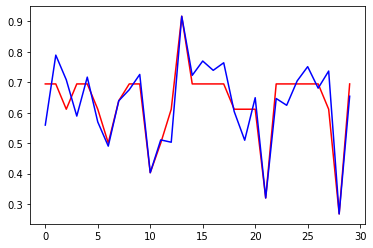

In [449]:
# 트레인 시각화
plt.plot(list(range(len(y_train))), y_pred_train, color='r')
plt.plot(list(range(len(y_train))), y_train, color='b')
plt.show()

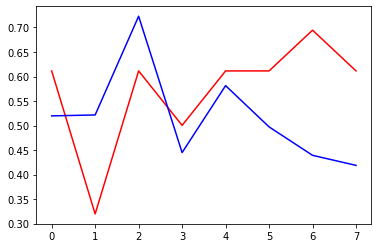

In [450]:
# 테스트 시각화
plt.plot(list(range(len(y_test))), pred, color='r')
plt.plot(list(range(len(y_test))), y_test, color='b')
plt.show()

In [451]:
# 웹툰의 예측 순위
chek = model.predict(new_kwew_test1)
df_chek = pd.DataFrame()
df_chek['kw_title'] = title
df_chek['ew_y_pred'] = chek
df_chek = df_chek.sort_values(by='ew_y_pred')
df_chek

,kw_title,ew_y_pred
146,"그 개, 만두",0.267379
113,범이올시다!,0.267379
199,"찬란하지 않아도 괜찮아, 새벽",0.267379
144,로그아웃,0.319780
98,닥터앤닥터 육아일기,0.319780
...,...,...
130,겟백,0.694536
134,꽃만 키우는데 너무강함,0.694536
135,흑막 여주가 날 새엄마로 만들려고 해,0.694536
103,귀곡의 문,0.694536


In [452]:
# 변수 중요도
f_ipt = pd.DataFrame(index=new_kwew1.columns[1:],data=model.feature_importances_,columns=['importance']).sort_values(by='importance',ascending=False)
f_ipt

,importance
trend_slope,0.487988
like_tot,0.392155
rate,0.100104
att_1_tot,0.019753
author_ex,0.000000
genre_1_에피소드,0.000000
genre_1_옴니버스,0.000000
genre_2_감성,0.000000
genre_2_개그,0.000000
genre_2_드라마,0.000000


In [453]:
# 따로 저장
rank_pred_list1 = df_chek
f_ipt1 = f_ipt

## 2) Linear_Regression

In [454]:
model = Linear_Regression(X_train,y_train)
pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('Test_RMSE:',np.sqrt(mean_squared_error(y_test,pred)),
      '\nTrain_RMSE:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

Test_RMSE: 0.3071513483036127 
Train_RMSE: 0.0401213416201791


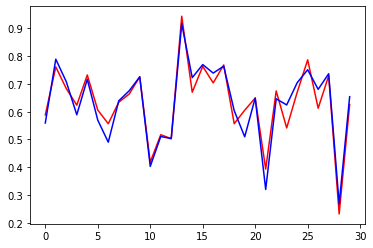

In [455]:
# 트레인 시각화
plt.plot(list(range(len(y_train))), y_pred_train, color='r')
plt.plot(list(range(len(y_train))), y_train, color='b')
plt.show()

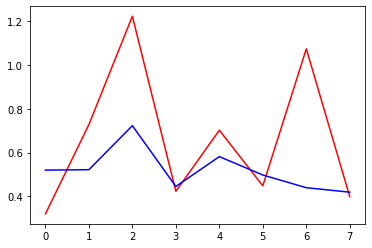

In [456]:
# 테스트 시각화
plt.plot(list(range(len(y_test))), pred, color='r')
plt.plot(list(range(len(y_test))), y_test, color='b')
plt.show()

In [457]:
# 웹툰의 예측 순위
chek = model.predict(new_kwew_test1)
df_chek = pd.DataFrame()
df_chek['kw_title'] = title
df_chek['ew_y_pred'] = chek
df_chek = df_chek.sort_values(by='ew_y_pred')
df_chek

,kw_title,ew_y_pred
14,오늘의 순정망화,-0.693816
12,히어로메이커,-0.490841
32,중독연구소,-0.476986
110,칼부림,-0.401302
184,후덜덜덜 남극전자,-0.043768
...,...,...
48,니나의 마법서랍,1.120655
249,언플래시레슨,1.266784
168,여성전용헬스장 진달래짐,1.350596
179,엽사:요괴사냥꾼,1.894421


In [458]:
# 따로 저장
rank_pred_list2 = df_chek

## 3) Ridge_Regression

In [459]:
model = Ridge_Regression(X_train,y_train)
pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('Test_RMSE:',np.sqrt(mean_squared_error(y_test,pred)),
      '\nTrain_RMSE:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

Test_RMSE: 0.18371749922691874 
Train_RMSE: 0.07548160409965514


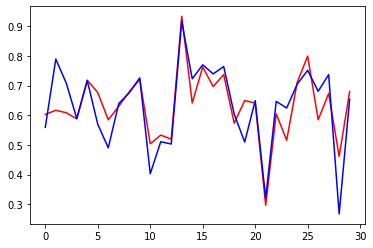

In [460]:
# 트레인 시각화
plt.plot(list(range(len(y_train))), y_pred_train, color='r')
plt.plot(list(range(len(y_train))), y_train, color='b')
plt.show()

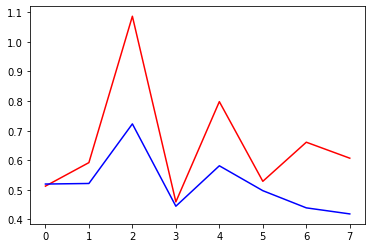

In [461]:
# 테스트 시각화
plt.plot(list(range(len(y_test))), pred, color='r')
plt.plot(list(range(len(y_test))), y_test, color='b')
plt.show()

In [462]:
# 웹툰의 예측 순위
chek = model.predict(new_kwew_test1)
df_chek = pd.DataFrame()
df_chek['kw_title'] = title
df_chek['ew_y_pred'] = chek
df_chek = df_chek.sort_values(by='ew_y_pred')
df_chek

,kw_title,ew_y_pred
12,히어로메이커,-0.235324
55,윌유메리미,0.212706
184,후덜덜덜 남극전자,0.236247
32,중독연구소,0.243530
261,내일,0.272838
...,...,...
127,연애혁명,0.980225
168,여성전용헬스장 진달래짐,1.055558
249,언플래시레슨,1.114270
179,엽사:요괴사냥꾼,1.427794


In [463]:
# 따로 저장
rank_pred_list3 = df_chek

## 4) XGBRegressor (과적합 규제 가능 모델)

In [467]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# 객체 생성
xgb_model = XGBRegressor()

# 후보 파라미터 선정
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# gridsearchcv 객체 정보 입력(모델, 파라미터 후보, 교차검증 횟수)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_test, y_test)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-auc:0.53396
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.55396
[2]	validation_0-auc:0.55348
[3]	validation_0-auc:0.55408
[4]	validation_0-auc:0.56294
[5]	validation_0-auc:0.56457
[6]	validation_0-auc:0.56012
[7]	validation_0-auc:0.56457
[8]	validation_0-auc:0.56457
[9]	validation_0-auc:0.56199
[10]	validation_0-auc:0.56199
[11]	validation_0-auc:0.56199
[12]	validation_0-auc:0.56199
[13]	validation_0-auc:0.56199
[14]	validation_0-auc:0.56199
[15]	validation_0-auc:0.56199
[16]	validation_0-auc:0.56199
[17]	validation_0-auc:0.56199
[18]	validation_0-auc:0.56199
[19]	validation_0-auc:0.56199
[20]	validation_0-auc:0.56199
[21]	validation_0-auc:0.56199
[22]	validation_0-auc:0.56199
[23]	validation_0-auc:0.56199
[24]	validation_0-auc:0.56199
[25]	validation_0-auc:0.56199
[26]	validation_0-auc:0.56199
[27]	validation_0-auc:0.56199
[28]	validation_0-auc:0.56199
[29]	validation_0-auc:0.56199
[30]	validation_0-auc:0.56199
[31]	validation_

[30]	validation_0-auc:0.55719
[31]	validation_0-auc:0.55719
[32]	validation_0-auc:0.55719
[33]	validation_0-auc:0.55719
[34]	validation_0-auc:0.55719
[35]	validation_0-auc:0.55719
Stopping. Best iteration:
[5]	validation_0-auc:0.56457

[0]	validation_0-auc:0.54005
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.54005
[2]	validation_0-auc:0.54558
[3]	validation_0-auc:0.57306
[4]	validation_0-auc:0.57164
[5]	validation_0-auc:0.56651
[6]	validation_0-auc:0.56651
[7]	validation_0-auc:0.57536
[8]	validation_0-auc:0.57536
[9]	validation_0-auc:0.57536
[10]	validation_0-auc:0.57536
[11]	validation_0-auc:0.57536
[12]	validation_0-auc:0.57536
[13]	validation_0-auc:0.57536
[14]	validation_0-auc:0.57536
[15]	validation_0-auc:0.57536
[16]	validation_0-auc:0.57536
[17]	validation_0-auc:0.57536
[18]	validation_0-auc:0.57536
[19]	validation_0-auc:0.57536
[20]	validation_0-auc:0.57536
[21]	validation_0-auc:0.57536
[22]	validation_0-auc:0.57536
[23]	validation_0-au

[18]	validation_0-auc:0.55979
[19]	validation_0-auc:0.55979
[20]	validation_0-auc:0.55979
[21]	validation_0-auc:0.55979
[22]	validation_0-auc:0.55979
[23]	validation_0-auc:0.55979
[24]	validation_0-auc:0.55979
[25]	validation_0-auc:0.55979
[26]	validation_0-auc:0.55979
[27]	validation_0-auc:0.55979
[28]	validation_0-auc:0.55979
[29]	validation_0-auc:0.55979
[30]	validation_0-auc:0.55979
[31]	validation_0-auc:0.55979
[32]	validation_0-auc:0.55979
[33]	validation_0-auc:0.55979
[34]	validation_0-auc:0.55979
Stopping. Best iteration:
[4]	validation_0-auc:0.57383

[0]	validation_0-auc:0.45200
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.47402
[2]	validation_0-auc:0.48914
[3]	validation_0-auc:0.51518
[4]	validation_0-auc:0.52075
[5]	validation_0-auc:0.52075
[6]	validation_0-auc:0.52426
[7]	validation_0-auc:0.52426
[8]	validation_0-auc:0.54330
[9]	validation_0-auc:0.53475
[10]	validation_0-auc:0.52960
[11]	validation_0-auc:0.51056
[12]	validation_0-au

[8]	validation_0-auc:0.54330
[9]	validation_0-auc:0.54330
[10]	validation_0-auc:0.54330
[11]	validation_0-auc:0.52426
[12]	validation_0-auc:0.52426
[13]	validation_0-auc:0.52930
[14]	validation_0-auc:0.52930
[15]	validation_0-auc:0.52930
[16]	validation_0-auc:0.52930
[17]	validation_0-auc:0.52930
[18]	validation_0-auc:0.52930
[19]	validation_0-auc:0.52930
[20]	validation_0-auc:0.52930
[21]	validation_0-auc:0.52930
[22]	validation_0-auc:0.52930
[23]	validation_0-auc:0.52930
[24]	validation_0-auc:0.52930
[25]	validation_0-auc:0.52930
[26]	validation_0-auc:0.52930
[27]	validation_0-auc:0.52930
[28]	validation_0-auc:0.52930
[29]	validation_0-auc:0.52930
[30]	validation_0-auc:0.52930
[31]	validation_0-auc:0.52930
[32]	validation_0-auc:0.52930
[33]	validation_0-auc:0.52930
[34]	validation_0-auc:0.52930
[35]	validation_0-auc:0.52930
[36]	validation_0-auc:0.52930
[37]	validation_0-auc:0.52930
[38]	validation_0-auc:0.52930
Stopping. Best iteration:
[8]	validation_0-auc:0.54330

[0]	validation_0

In [468]:
# colsample_bytree = 0.5,max_depth=7, min_child_weight=1 

In [469]:
def XGBRegressor(train_var_scale, train_y):
    model = xgb.XGBRegressor(colsample_bytree = 0.5,max_depth=7, min_child_weight=1)
    history = model.fit(train_var_scale,train_y, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_test, y_test)])
    return model

In [470]:
model = XGBRegressor(X_train,y_train)
pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('Test_RMSE:',np.sqrt(mean_squared_error(y_test,pred)),
      '\nTrain_RMSE:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

[0]	validation_0-auc:0.54682
Will train until validation_0-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.55957
[2]	validation_0-auc:0.56145
[3]	validation_0-auc:0.57031
[4]	validation_0-auc:0.56400
[5]	validation_0-auc:0.57031
[6]	validation_0-auc:0.55780
[7]	validation_0-auc:0.55780
[8]	validation_0-auc:0.55780
[9]	validation_0-auc:0.55780
[10]	validation_0-auc:0.55312
[11]	validation_0-auc:0.55780
[12]	validation_0-auc:0.55312
[13]	validation_0-auc:0.55312
[14]	validation_0-auc:0.54948
[15]	validation_0-auc:0.55312
[16]	validation_0-auc:0.55312
[17]	validation_0-auc:0.55312
[18]	validation_0-auc:0.55312
[19]	validation_0-auc:0.55312
[20]	validation_0-auc:0.55312
[21]	validation_0-auc:0.55312
[22]	validation_0-auc:0.55312
[23]	validation_0-auc:0.55312
[24]	validation_0-auc:0.55312
[25]	validation_0-auc:0.55312
[26]	validation_0-auc:0.55312
[27]	validation_0-auc:0.55312
[28]	validation_0-auc:0.55312
[29]	validation_0-auc:0.55312
[30]	validation_0-auc:0.55312
[31]	validation

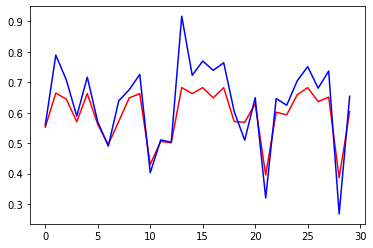

In [471]:
# 트레인 시각화
plt.plot(list(range(len(y_train))), y_pred_train, color='r')
plt.plot(list(range(len(y_train))), y_train, color='b')
plt.show()

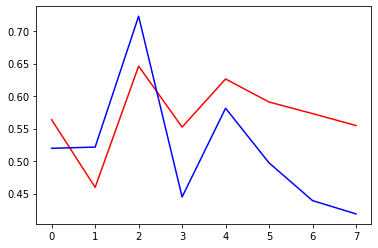

In [472]:
# 테스트 시각화
plt.plot(list(range(len(y_test))), pred, color='r')
plt.plot(list(range(len(y_test))), y_test, color='b')
plt.show()

In [473]:
# 웹툰의 예측 순위
chek = model.predict(new_kwew_test1)
df_chek = pd.DataFrame()
df_chek['kw_title'] = title
df_chek['ew_y_pred'] = chek
df_chek = df_chek.sort_values(by='ew_y_pred', ascending=False)
df_chek

,kw_title,ew_y_pred
171,걸어서 30분,0.682401
0,뷰티풀 군바리,0.666973
95,연놈,0.658769
16,평범한 8반,0.651259
92,급식아빠,0.648661
...,...,...
118,스캔들,0.438661
25,"선배, 그 립스틱 바르지 마요",0.438661
162,헬프미,0.438661
146,"그 개, 만두",0.435828


In [475]:
df_chek.head(15)

,kw_title,ew_y_pred
171,걸어서 30분,0.682401
0,뷰티풀 군바리,0.666973
95,연놈,0.658769
16,평범한 8반,0.651259
92,급식아빠,0.648661
129,노답소녀,0.648661
206,프리드로우,0.637078
270,동생친구,0.636429
134,꽃만 키우는데 너무강함,0.636429
3,장씨세가 호위무사,0.636429


In [442]:
# 변수 중요도
f_ipt = pd.DataFrame(index=new_kwew1.columns[1:],data=model.feature_importances_,columns=['importance']).sort_values(by='importance',ascending=False)
f_ipt

,importance
genre_1_옴니버스,0.216654
social_search,0.156289
trend_slope,0.124160
like_tot,0.111250
att_1_tot,0.105274
comments_tot_slope,0.057596
max_ep,0.038544
rate,0.038072
like_tot_slope,0.036697
subscribe,0.025956


In [443]:
# 따로 저장
rank_pred_list4 = df_chek
f_ipt4 = f_ipt